In [51]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

nola = pd.read_csv("Nola_feat.csv")

In [52]:
#Makes a string from strikes and balls
nola["count_id"] = None
for ix, (b,s) in enumerate(zip(nola.balls, nola.strikes)):
    nola.count_id[ix] = str(b)+"-"+str(s)

In [57]:
nola.head()

,pitch_type,batter,pitch_number,inning,stand,balls,strikes,outs_when_up,runner_pressure,score_diff,...,lsangle_hist,prev_hth,count_id,pitch_count,batter_count,pitch_last,pitch_hist,number_pitch,count_pitch,velo_grad
0,FF,444379,1,1,1,0,0,0,0.000000,0,...,NaN,0,0-0,1,1,NaN,NaN,0,0,NaN
1,FF,444379,2,1,1,1,0,0,0.000000,0,...,NaN,0,1-0,2,1,0.0,0.0,2,2,NaN
2,FF,444379,3,1,1,1,1,0,0.000000,0,...,NaN,0,1-1,3,1,0.0,0.0,2,2,NaN
3,SI,444379,4,1,1,2,1,0,0.000000,0,...,NaN,0,2-1,4,1,0.0,0.0,2,0,0.45
4,FF,519306,1,1,0,0,0,0,0.333333,0,...,NaN,0,0-0,5,2,1.0,NaN,0,0,1.00


In [56]:
nola.pitch_type.replace(0,"FF", inplace=True)
nola.pitch_type.replace(1,"SI", inplace=True)
nola.pitch_type.replace(2,"CU", inplace=True)
nola.pitch_type.replace(3,"CH", inplace=True)

In [58]:
nola[nola.batter==664040].groupby(["pitch_type"]).agg({"pitch_type": "count"}).pitch_type.sort_values(ascending=False)

pitch_type
CU    8
CH    5
FF    5
SI    3
Name: pitch_type, dtype: int64

In [61]:
nola.groupby(["pitch_number", "pitch_type"]).agg({'pitch_number': 'count'})

pitch_number
pitch_number pitch_type              
1            CH                   435
             CU                  1032
             FF                  1249
             SI                   730
2            CH                   595
             CU                   931
             FF                   877
             SI                   650
3            CH                   511
             CU                   800
             FF                   753
             SI                   517
4            CH                   309
             CU                   627
             FF                   555
             SI                   405
5            CH                   230
             CU                   412
             FF                   306
             SI                   263
6            CH                   105
             CU                   210
             FF                   164
             SI                   120
7            CH                    36
             CU                    79
             FF                    67
             SI                    56
8            CH                    20
             CU                    32
             FF                    27
             SI                    14
9            CH                     9
             CU                     9
             FF                    11
             SI                     4
10           CH                     5
             CU                     3
             FF                     4
             SI                     2
11           CH                     1
             CU                     1
             FF                     2
12           CU                     2

In [86]:
count_df=nola.groupby(["count_id", "pitch_type"]).agg({'count_id': 'count'})

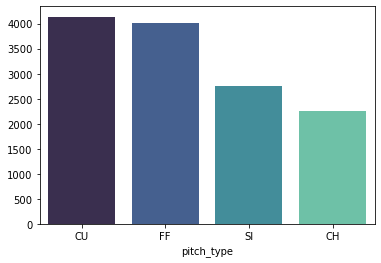

In [63]:
palette="mako"
dfpt = pd.Series(nola.groupby(by='pitch_type').count().pitch_count.sort_values(ascending=False))
sns.barplot(dfpt.index, dfpt.values, palette=palette);

In [70]:
nola2=pd.read_csv("Nola_all_clean.csv")

In [85]:
batter_df=nola2.groupby(by='batter_name').count().inning.sort_values(ascending=False)
batter_df[:12]

batter_name
Anthony Rendon      182
Freddie Freeman     180
Michael Conforto    178
Nick Markakis       169
Juan Soto           160
Brandon Nimmo       151
Trea Turner         150
Ender Inciarte      149
Adam Eaton          142
Ryan Zimmerman      137
Bryce Harper        133
Ronald Acuna        127
Name: inning, dtype: int64

In [79]:
#Opponent field
nola2["home_fld"] = (nola2.home_team=="PHI").astype(int)
nola2["opponent"] = None
for ix, _ in enumerate(nola2.opponent):
    if nola2.home_fld[ix] == 1:
        nola2.opponent[ix] = nola2.away_team[ix]
    else:
        nola2.opponent[ix] = nola2.home_team[ix]

In [84]:
team_df = nola2.groupby(by='opponent').count().inning.sort_values(ascending=False)
team_df[:7]

opponent
WSH    2056
ATL    1826
NYM    1527
MIA    1402
STL     599
MIL     577
CIN     570
Name: inning, dtype: int64

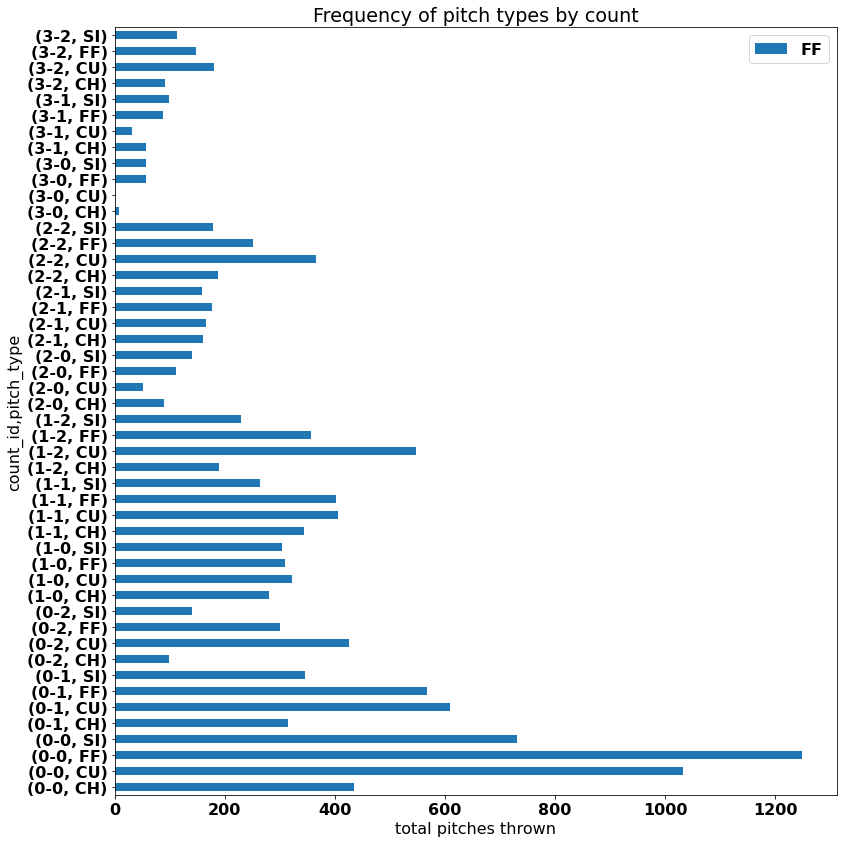

In [92]:
#Make font readable or slides
plt.rc('font', **{'weight':'bold', 'size':16})
fig, ax = plt.subplots(figsize=(12,12))
count_df.plot(kind='barh', stacked=True)
ax.legend(["FF","CU","SI","CH"], bbox_to_anchor=(1, 1))
ax.set_title('Frequency of pitch types by count')
ax.set_xlabel('pitches thrown')
plt.tight_layout()
#Save
#plt.savefig('visuals/stacked_bar_pitches.png')

In [98]:
count_df

count_id
count_id pitch_type          
0-0      CH               435
         CU              1032
         FF              1249
         SI               730
0-1      CH               314
         CU               609
         FF               567
         SI               346
0-2      CH                99
         CU               426
         FF               300
         SI               141
1-0      CH               281
         CU               322
         FF               310
         SI               304
1-1      CH               343
         CU               405
         FF               402
         SI               263
1-2      CH               190
         CU               548
         FF               356
         SI               230
2-0      CH                90
         CU                51
         FF               112
         SI               141
2-1      CH               160
         CU               166
         FF               176
         SI               158
2-2      CH               188
         CU               366
         FF               251
         SI               179
3-0      CH                 8
         CU                 1
         FF                57
         SI                57
3-1      CH                57
         CU                32
         FF                87
         SI                99
3-2      CH                91
         CU               180
         FF               148
         SI               113